In [10]:
## Visión por Computadora - Trabajo Práctico 3

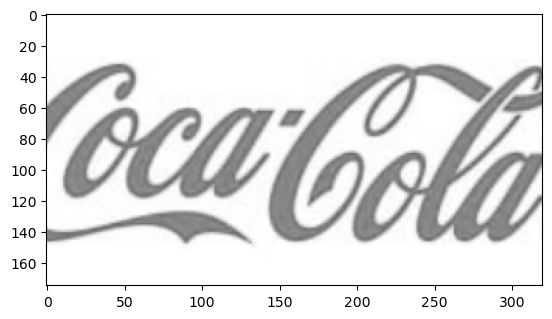

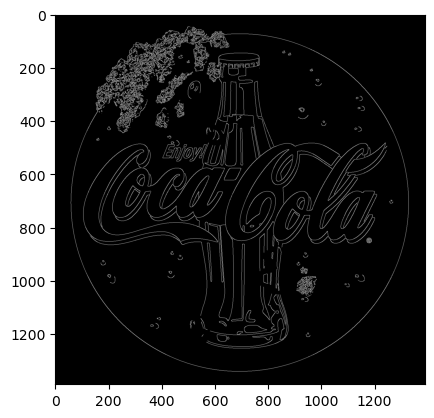

best_match.shape =  (262, 480)


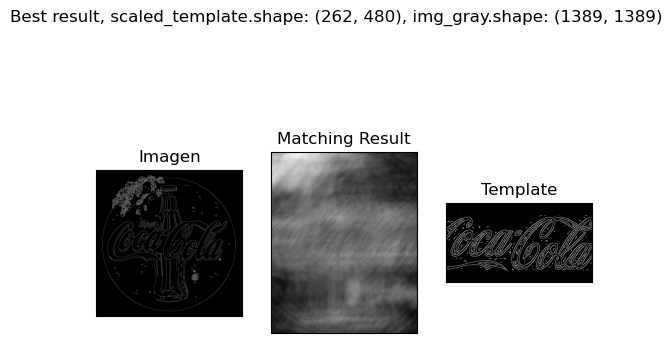

best_match.shape =  (81, 149)


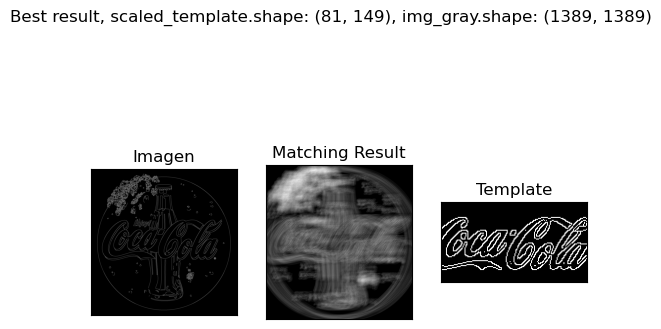

best_match.shape (final) =  (81, 149)


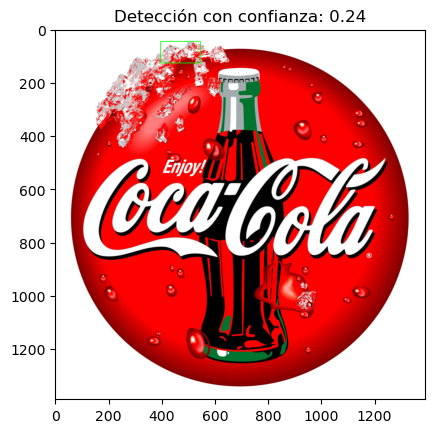

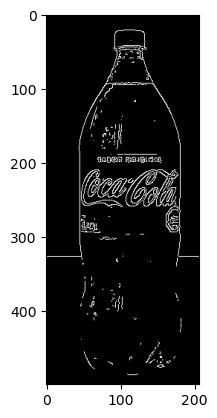

best_match.shape =  (112, 205)


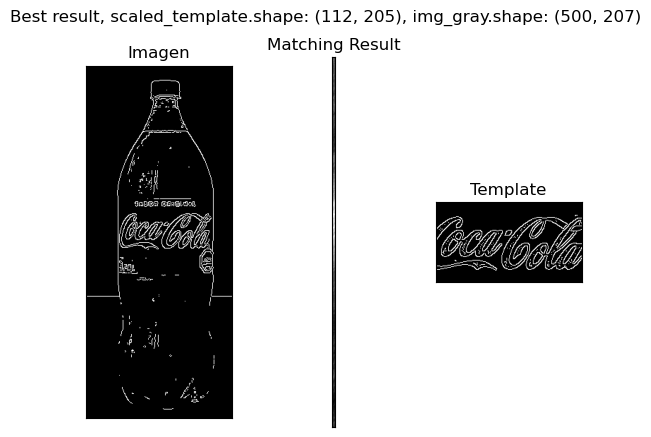

best_match.shape =  (81, 149)


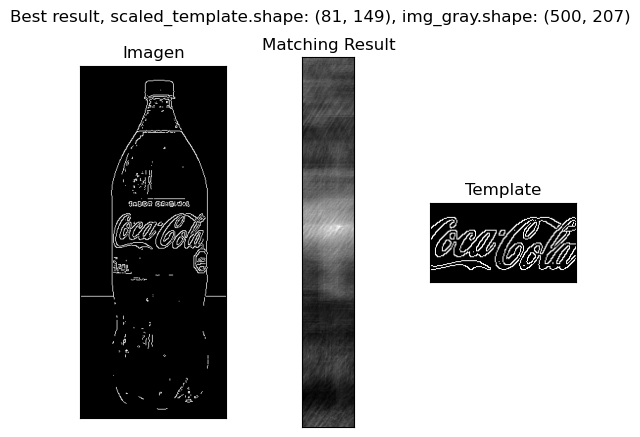

best_match.shape =  (77, 141)


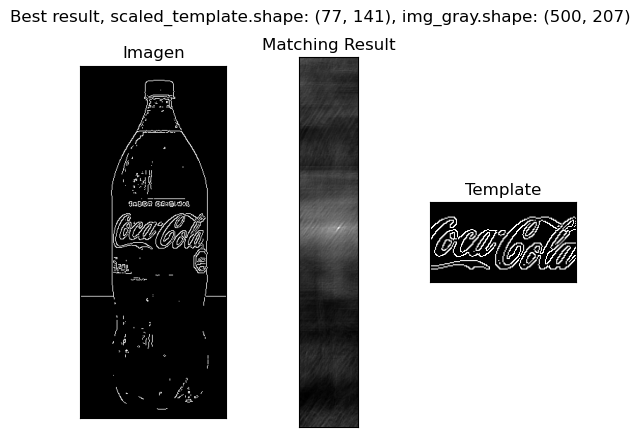

best_match.shape (final) =  (77, 141)


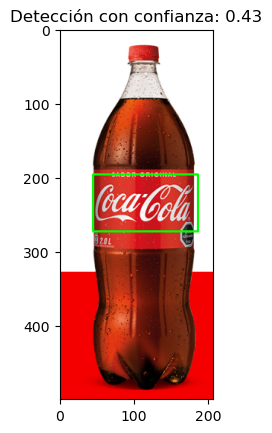

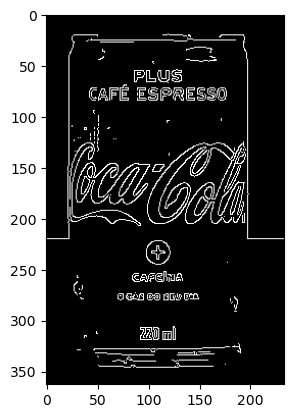

best_match.shape =  (126, 229)


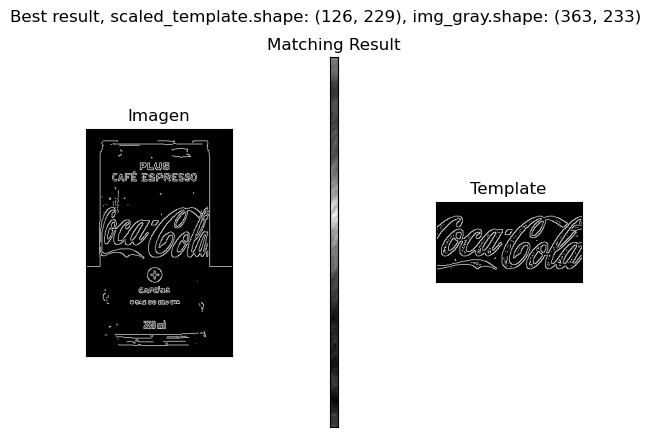

best_match.shape =  (121, 221)


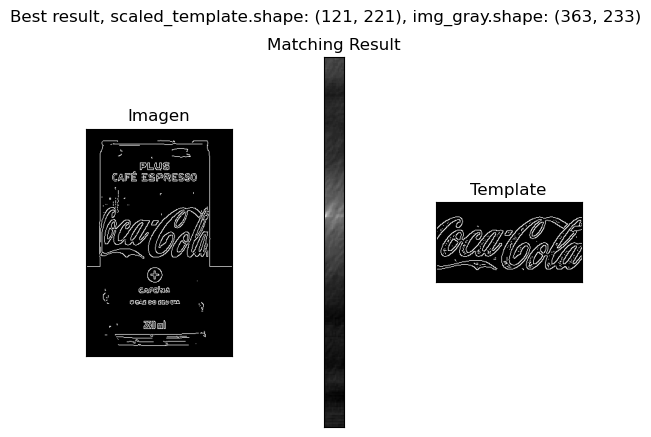

best_match.shape (final) =  (121, 221)


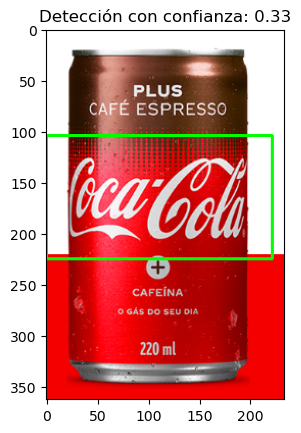

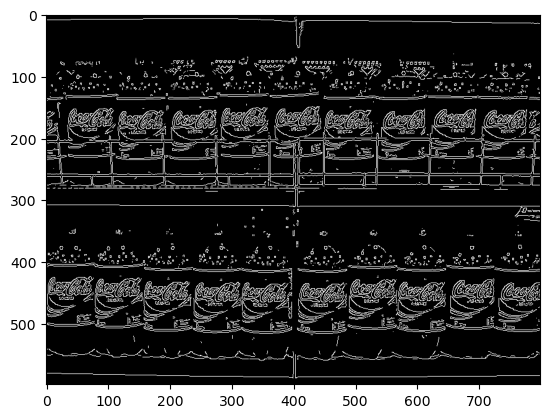

best_match.shape =  (262, 480)


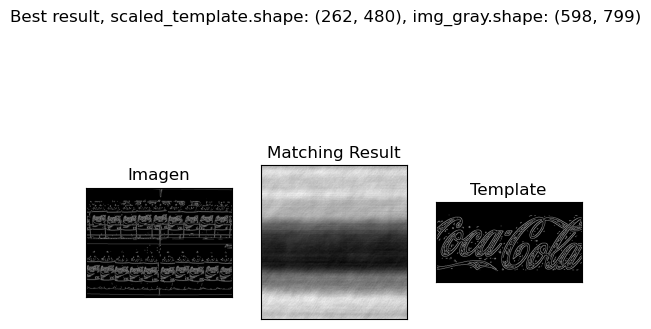

best_match.shape =  (79, 145)


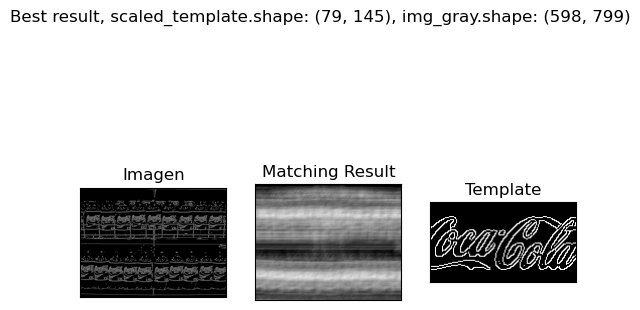

best_match.shape =  (46, 84)


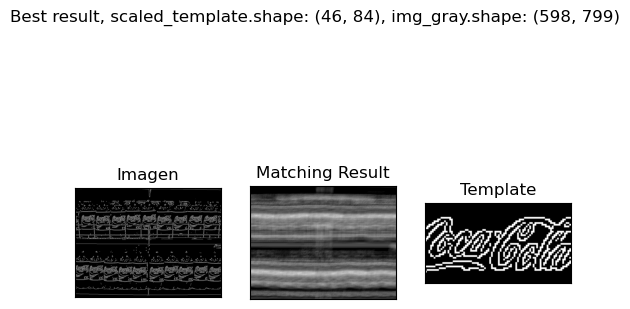

best_match.shape =  (44, 80)


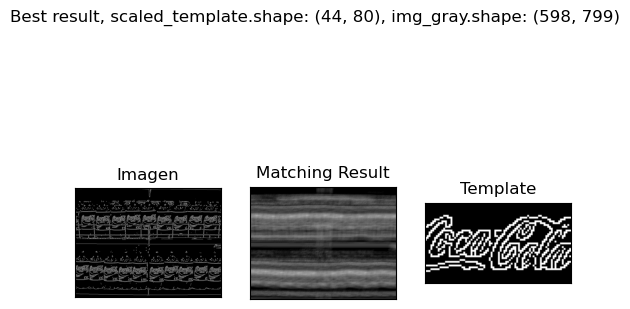

best_match.shape (final) =  (44, 80)


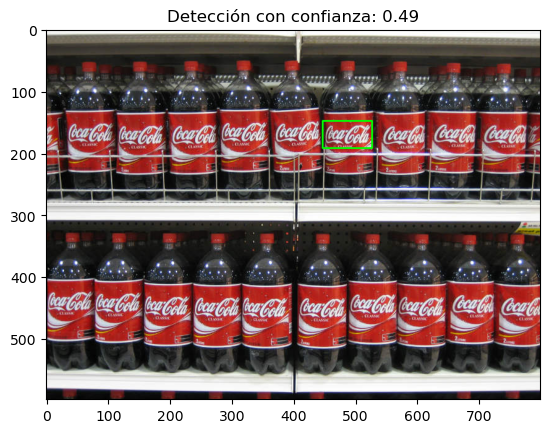

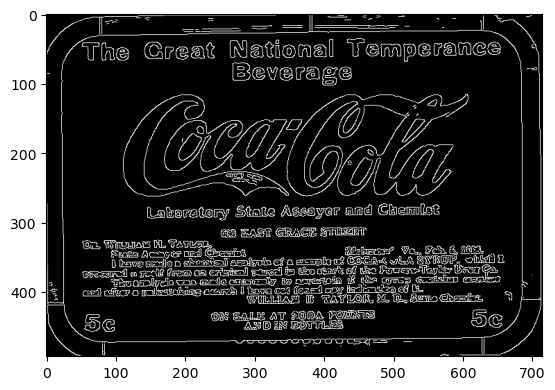

best_match.shape =  (262, 480)


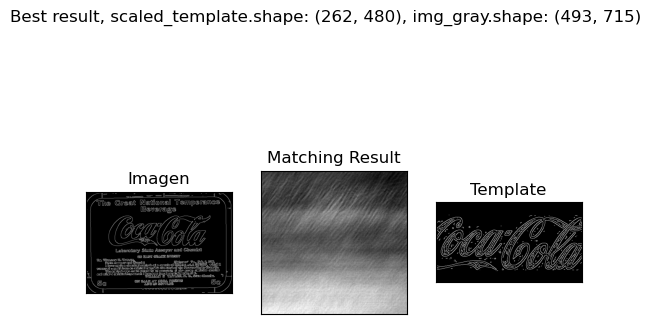

best_match.shape =  (86, 157)


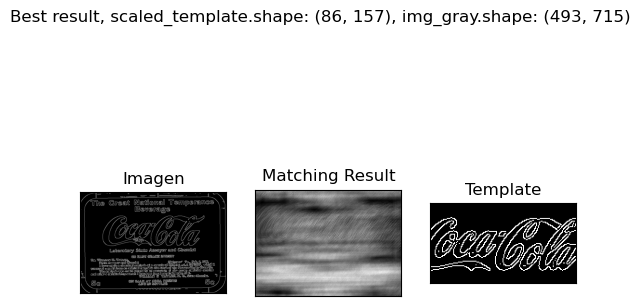

best_match.shape =  (44, 80)


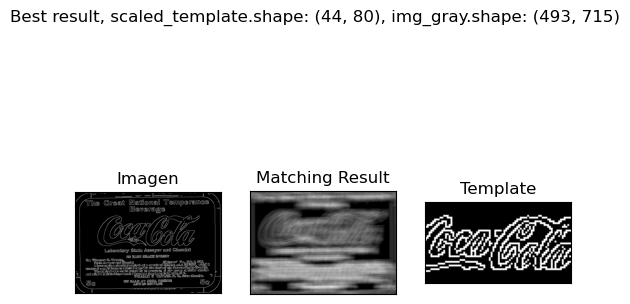

best_match.shape (final) =  (44, 80)


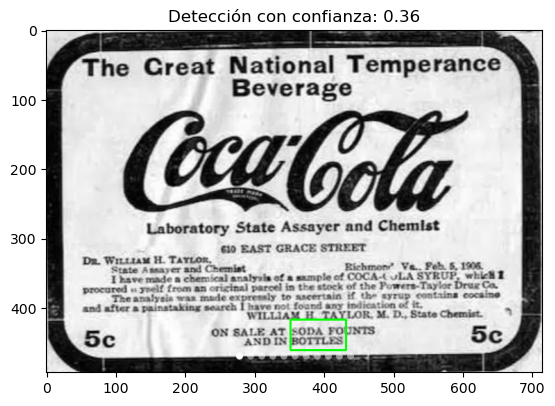

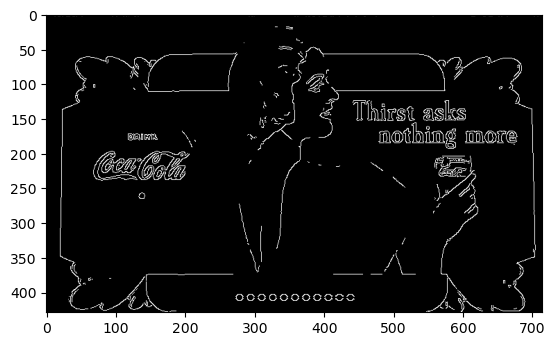

best_match.shape =  (262, 480)


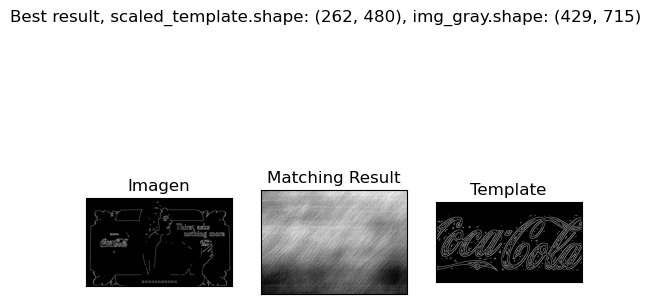

best_match.shape =  (108, 197)


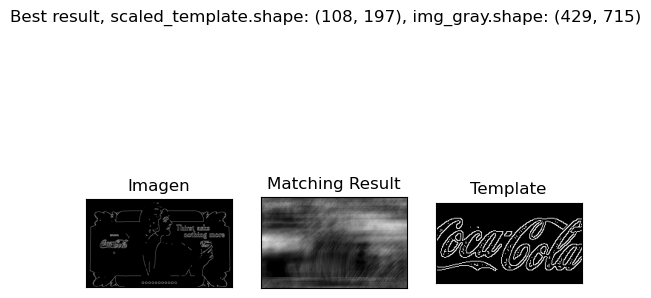

best_match.shape =  (75, 137)


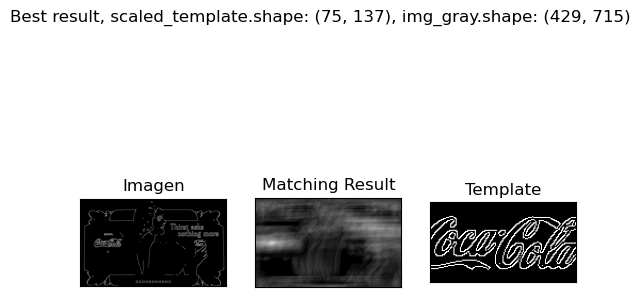

best_match.shape =  (64, 116)


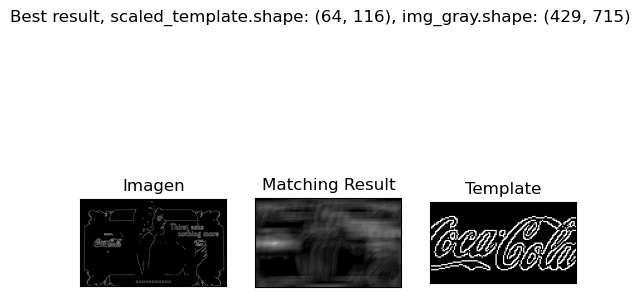

best_match.shape (final) =  (64, 116)


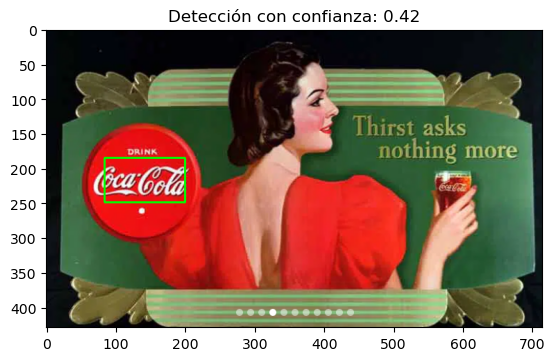

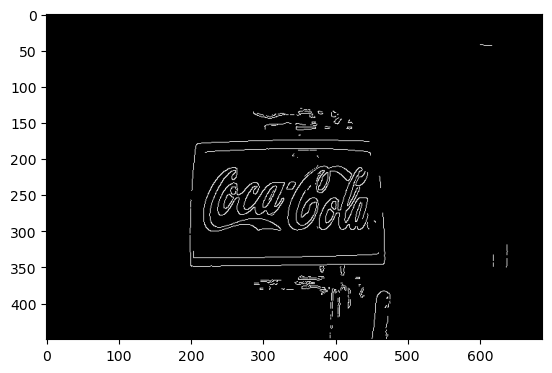

best_match.shape =  (262, 480)


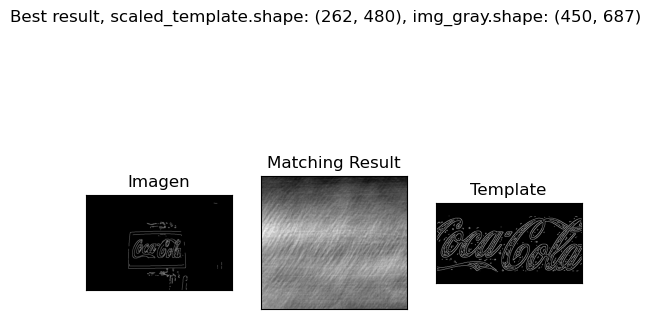

best_match.shape =  (134, 246)


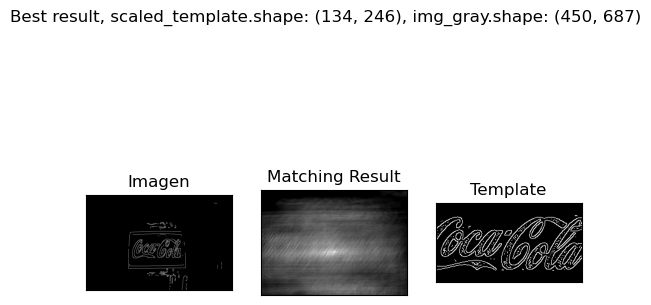

best_match.shape (final) =  (134, 246)


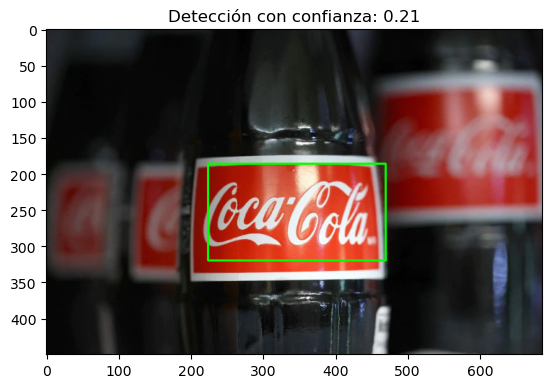

In [17]:
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import glob

# Ruta a las imágenes y al template
image_paths = glob.glob('./images/*.*')
#image_paths = glob.glob('./images/COCA-COLA-LOGO.jpg')
template_path = './template/pattern.png'

# Cargar el template
template = cv.imread(template_path, 0)
#template = cv.Laplacian(template,cv.CV_8U)
#template = cv.Sobel(template,cv.CV_8U,1,0,ksize=3)
#template = cv.Canny(template, 220, 260, apertureSize = 3)
template_w, template_h = template.shape[::-1]

new_width = int(template.shape[1] * 0.80)

# Calcula el punto de inicio para el recorte (centrado)
start_x = (template.shape[1] - new_width) // 2

template = template[:, start_x:start_x + new_width]

plt.figure()
plt.imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB))
plt.show()

def detect_logo(img, template, min_scale=0.25, max_scale=1.5, scale_step=0.1, threshold=0.10):
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    #img_gray = cv.Laplacian(img_gray,cv.CV_8U)
    #img_gray = cv.Sobel(img_gray,cv.CV_8U,1,0,ksize=3)
    img_gray = cv.Canny(img_gray, 220, 260, apertureSize = 3)
    img_h, img_w = img_gray.shape
    best_match = None
    best_val = -1
    best_loc = None
    best_scale = 1.0

    plt.figure()
    plt.imshow(cv.cvtColor(img_gray, cv.COLOR_BGR2RGB))
    plt.show()
    
    scales = np.linspace(max_scale, min_scale, 100)

    # generamos nuestra "piramide" de tamaños arbitrarios
    # list_results = []
    for scale in scales:
        scaled_template = cv.resize(template, None, fx=scale, fy=scale)

        #scaled_template = cv.resize(template, None, fx=scale, fy=scale, interpolation=cv.INTER_AREA)
        scaled_template = cv.Canny(scaled_template, 220, 260, apertureSize = 5)
        scaled_template_h, scaled_template_w = scaled_template.shape
        
        # Verificar que el template no sea más grande que la imagen
        if scaled_template_h <= img_h and scaled_template_w <= img_w:
            #res = cv.matchTemplate(img_gray, scaled_template, cv.TM_CCOEFF_NORMED)
            res = cv.matchTemplate(img_gray, scaled_template, cv.TM_CCORR_NORMED)
            min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
            
            # if scaled_template.shape[0] > 200:
            #     list_results.append([img_gray, res, scaled_template, max_val])

            if max_val > (best_val + 0.1):
                best_val = max_val
                best_loc = max_loc
                best_match = scaled_template
                print('best_match.shape = ', best_match.shape)
                best_scale = scale

                #plt.figure()
                #plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
                #plt.show()

                plt.subplot(131)
                plt.imshow(img_gray, cmap='gray')  # 'aspect' se ajusta para evitar distorsiones
                plt.title('Imagen')
                plt.xticks([]), plt.yticks([])

                plt.subplot(132)
                plt.imshow(res, cmap='gray')  # 'aspect' se ajusta para evitar distorsiones
                plt.title('Matching Result')
                plt.xticks([]), plt.yticks([])

                # Imagen original con recuadros
                plt.subplot(133)
                plt.imshow(scaled_template, cmap='gray')  # 'aspect' se ajusta para evitar distorsiones
                plt.title('Template')
                plt.xticks([]), plt.yticks([])

                plt.suptitle(f'Best result, scaled_template.shape: {scaled_template.shape}, img_gray.shape: {img_gray.shape}')
                plt.show()

    # list_results.sort(key=lambda x: x[3], reverse=True)

    # for result in list_results[:3]:

    #     plt.subplot(131)
    #     plt.imshow(result[0], cmap='gray')  # 'aspect' se ajusta para evitar distorsiones
    #     plt.title('Imagen')
    #     plt.xticks([]), plt.yticks([])

    #     plt.subplot(132)
    #     plt.imshow(result[1], cmap='gray')  # 'aspect' se ajusta para evitar distorsiones
    #     plt.title('Matching Result')
    #     plt.xticks([]), plt.yticks([])

    #     # Imagen original con recuadros
    #     plt.subplot(133)
    #     plt.imshow(result[2], cmap='gray')  # 'aspect' se ajusta para evitar distorsiones
    #     plt.title(f'Template (best_val = {result[3]})')
    #     plt.xticks([]), plt.yticks([])

    #     plt.show()
    
    if best_val >= threshold:
        print('best_match.shape (final) = ', best_match.shape)
        best_w, best_h = best_match.shape[::-1]
        top_left = best_loc
        bottom_right = (top_left[0] + best_w, top_left[1] + best_h)
        cv.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)
        confidence = best_val
        return img, confidence
    else:
        return img, None

# Mostrar resultados
for image_path in image_paths:

    img = cv.imread(image_path)
    #img = cv.GaussianBlur(img, ksize=(17, 17), sigmaX=1,  sigmaY=1)

    detected_img, confidence = detect_logo(img, template)

    plt.figure()
    plt.imshow(cv.cvtColor(detected_img, cv.COLOR_BGR2RGB))
    if confidence:
        plt.title(f'Detección con confianza: {confidence:.2f}')
    else:
        plt.title('No se detectó el logotipo')
    plt.show()
